In [2]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt

In [3]:
root_file_dir= '~/Desktop/ROOT_files/'
file= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root')

In [4]:
file.items()

[('recTree;29', <TTree 'recTree' (1545 branches) at 0x7f09401efee0>),
 ('recTree;28', <TTree 'recTree' (1545 branches) at 0x7f09401ef4f0>),
 ('TotalPOT;1', <TH1F (version 3) at 0x7f08f1bfbf40>),
 ('TotalEvents;1', <TH1F (version 3) at 0x7f08f1bfffa0>),
 ('metadata;1', <ReadOnlyDirectory '/metadata' at 0x7f09401efca0>),
 ('metadata/metatree;1', <TTree 'metatree' (2 branches) at 0x7f08f1c0b310>)]

In [5]:
TotalEvents= file['TotalEvents']
TotalPOT= file['TotalPOT']
file.items()

[('recTree;29', <TTree 'recTree' (1545 branches) at 0x7f09401efee0>),
 ('recTree;28', <TTree 'recTree' (1545 branches) at 0x7f09401ef4f0>),
 ('TotalPOT;1', <TH1F (version 3) at 0x7f08f1bfbf40>),
 ('TotalEvents;1', <TH1F (version 3) at 0x7f08f1bfffa0>),
 ('metadata;1', <ReadOnlyDirectory '/metadata' at 0x7f09401efca0>),
 ('metadata/metatree;1', <TTree 'metatree' (2 branches) at 0x7f08f1c0b310>)]

In [90]:
file['recTree'].keys(filter_name='*mc*')

['rec.hdr.ismc',
 'rec.hdr.mctype',
 'rec.mc.nnu',
 'rec.mc.nprtl',
 'rec.mc.nu..length',
 'rec.mc.nu.E',
 'rec.mc.nu.Q2',
 'rec.mc.nu.baseline',
 'rec.mc.nu.bjorkenX',
 'rec.mc.nu.cryostat',
 'rec.mc.nu.det',
 'rec.mc.nu.eccqe',
 'rec.mc.nu.genVersion..length',
 'rec.mc.nu.genVersion..totarraysize',
 'rec.mc.nu.genVersion',
 'rec.mc.nu.genVersion..idx',
 'rec.mc.nu.generator',
 'rec.mc.nu.genie_inttype',
 'rec.mc.nu.genie_mode',
 'rec.mc.nu.genweight',
 'rec.mc.nu.hitnuc',
 'rec.mc.nu.imp_weight',
 'rec.mc.nu.index',
 'rec.mc.nu.inelasticityY',
 'rec.mc.nu.initpdg',
 'rec.mc.nu.is_numucc_primary',
 'rec.mc.nu.iscc',
 'rec.mc.nu.ischarm',
 'rec.mc.nu.isnc',
 'rec.mc.nu.isseaquark',
 'rec.mc.nu.isvtxcont',
 'rec.mc.nu.modq',
 'rec.mc.nu.modq_lab',
 'rec.mc.nu.momentum.x',
 'rec.mc.nu.momentum.y',
 'rec.mc.nu.momentum.z',
 'rec.mc.nu.nneutron',
 'rec.mc.nu.npiminus',
 'rec.mc.nu.npiplus',
 'rec.mc.nu.npizero',
 'rec.mc.nu.nprim',
 'rec.mc.nu.nproton',
 'rec.mc.nu.parent_dcy_E',
 'rec.mc.

In [15]:
file['recTree']['rec.reco.trk.npts'].array()

<Array [[2302], ..., [1588, 1433, ..., 831, 626]] type='4816 * var * uint16'>

In [91]:
file['recTree']['rec.mc.nu.prim.G4ID'].array()

<Array [[], [], [], [], [], ..., [], [], [], [], []] type='4816 * var * int32'>

In [12]:
file['recTree']['rec.reco.trk.pfp.daughters..length'].array()

<Array [[7], [0, ...], ..., [0, 0, 11, 7, 10, 8, 3]] type='4816 * var * int32'>

Text(0.5, 1.02, 'Histogram of photoelectrons per CRT hit')

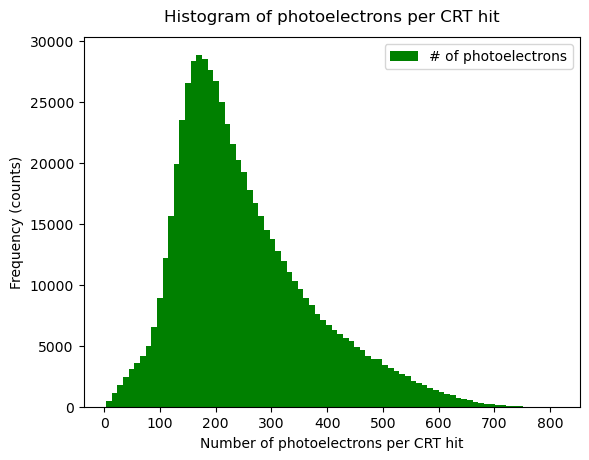

In [93]:
a= file['recTree']['rec.crt_hits.pe'].array()
a= ak.flatten(a)
plt.hist(a, 80, color= 'g', label= '# of photoelectrons')
plt.xlabel('Number of photoelectrons per CRT hit')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.title('Histogram of photoelectrons per CRT hit', y=1.02)
#plt.savefig('crt_pe_hist.png')

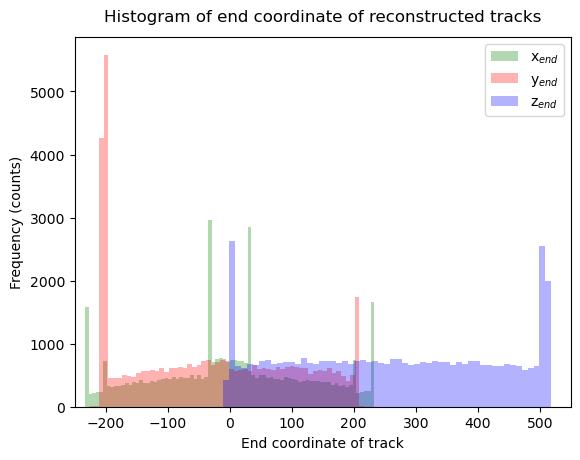

In [33]:
xf= file['recTree']['rec.reco.trk.end.x'].array()
yf= file['recTree']['rec.reco.trk.end.y'].array()
zf= file['recTree']['rec.reco.trk.end.z'].array()

xf= ak.flatten(xf)
plt.hist(xf, 80, color= 'g', label= r'x$_{end}$', alpha=0.3)

yf= ak.flatten(yf)
plt.hist(yf, 80, color= 'r', label= r'y$_{end}$', alpha=0.3)

zf= ak.flatten(zf)
plt.hist(zf, 80, color= 'b', label= r'z$_{end}$', alpha=0.3)

plt.xlabel('End coordinate of track')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.xlim((-250,550))
plt.title('Histogram of end coordinate of reconstructed tracks', y=1.02)
plt.savefig('end_r.png')

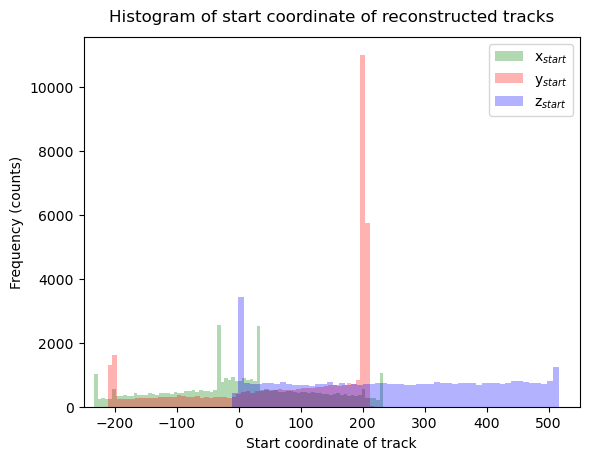

In [34]:
xf= file['recTree']['rec.reco.trk.start.x'].array()
yf= file['recTree']['rec.reco.trk.start.y'].array()
zf= file['recTree']['rec.reco.trk.start.z'].array()

xf= ak.flatten(xf)
plt.hist(xf, 80, color= 'g', label= r'x$_{start}$', alpha=0.3)

yf= ak.flatten(yf)
plt.hist(yf, 80, color= 'r', label= r'y$_{start}$', alpha=0.3)

zf= ak.flatten(zf)
plt.hist(zf, 80, color= 'b', label= r'z$_{start}$', alpha=0.3)

plt.xlabel('Start coordinate of track')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.xlim((-250,550))
plt.title('Histogram of start coordinate of reconstructed tracks', y=1.02)
plt.savefig('start_r.png')

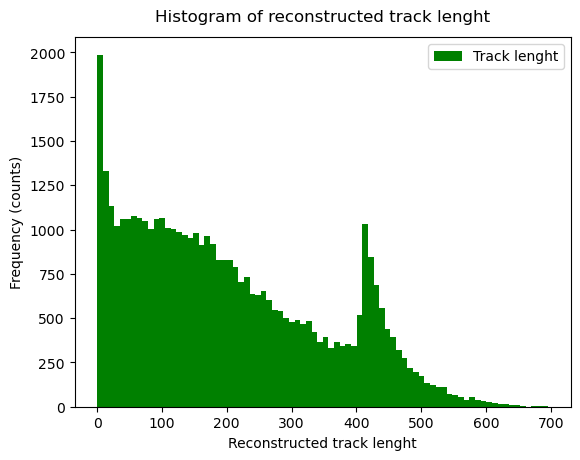

In [38]:
a= file['recTree']['rec.reco.trk.len'].array()
a= ak.flatten(a)
plt.hist(a[a<700], 80, color= 'g', label= 'Track lenght')
plt.xlabel('Reconstructed track lenght')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.title('Histogram of reconstructed track lenght', y=1.02)
plt.savefig('reco_trk_len.png')

1033.3773

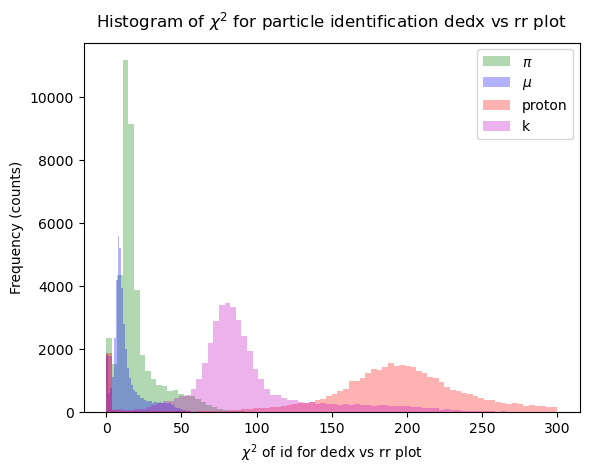

In [58]:
a= file['recTree']['rec.reco.trk.chi2pid.2.chi2_pion'].array()
a= ak.flatten(a)

b= file['recTree']['rec.reco.trk.chi2pid.2.chi2_muon'].array()
b= ak.flatten(b)

c= file['recTree']['rec.reco.trk.chi2pid.2.chi2_proton'].array()
c= ak.flatten(c)

d= file['recTree']['rec.reco.trk.chi2pid.2.chi2_kaon'].array()
d= ak.flatten(d)

plt.hist(a[a<300], 80, color= 'g', label= r'$\pi$', alpha=0.3)
plt.hist(b[b<300], 80, color= 'b', label= r'$\mu$', alpha=0.3)
plt.hist(c[c<300], 80, color= 'r', label= r'proton', alpha=0.3)
plt.hist(d[d<300], 80, color= 'm', label= r'k', alpha=0.3)

plt.xlabel('$\chi^2$ of id for dedx vs rr plot')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.title(r'Histogram of $\chi^2$ for particle identification dedx vs rr plot', y=1.02)
plt.savefig('chi2.png')
a.to_numpy().max()

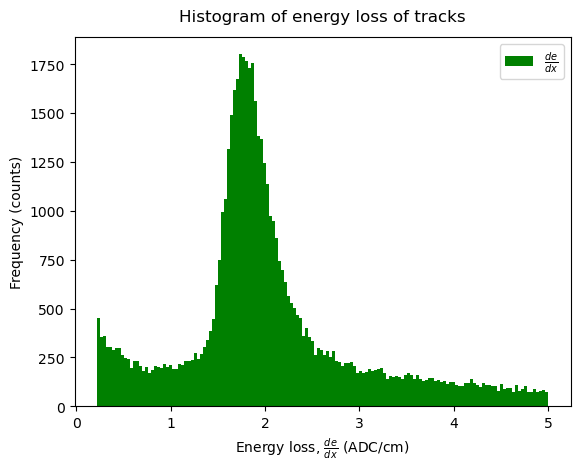

In [73]:
dedx= file['recTree']['rec.reco.trk.calo.2.points.dedx'].array()
dedx= ak.flatten(dedx).to_numpy()

rr= file['recTree']['rec.reco.trk.calo.2.points.rr'].array()
rr= ak.flatten(rr).to_numpy()

remove= np.where((dedx>5)|(rr>5))
dedx= np.delete(dedx, remove)

plt.hist(dedx, 150, color= 'g', label= r'$\frac{de}{dx}$')
plt.xlabel(r'Energy loss, $\frac{de}{dx}$ (ADC/cm)')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.title('Histogram of energy loss of tracks', y=1.02)
plt.savefig('reco_dedx.png')

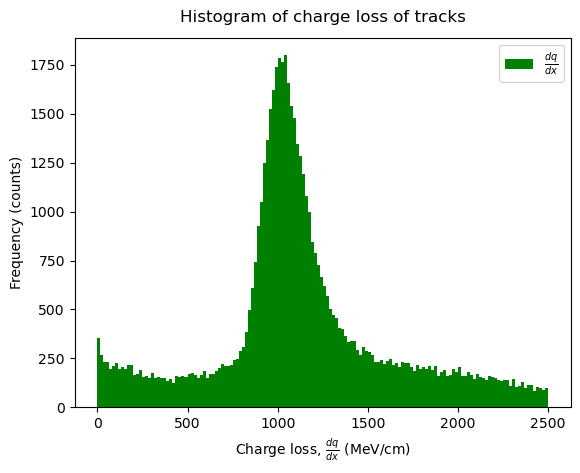

In [80]:
dqdx= file['recTree']['rec.reco.trk.calo.2.points.dqdx'].array()
dqdx= ak.flatten(dqdx).to_numpy()


rr= file['recTree']['rec.reco.trk.calo.2.points.rr'].array()
rr= ak.flatten(rr).to_numpy()

remove= np.where((dqdx>2500)|(rr>5))
dqdx= np.delete(dqdx, remove)

plt.hist(dqdx, 150, color= 'g', label= r'$\frac{dq}{dx}$')
plt.xlabel(r'Charge loss, $\frac{dq}{dx}$ (MeV/cm)')
plt.ylabel('Frequency (counts)')
plt.legend()
plt.title('Histogram of charge loss of tracks', y=1.02)
plt.savefig('reco_dqdx.png')

In [29]:
file['recTree'].keys(filter_name='*tpc')


['rec.mc.nu.prim.cont_tpc',
 'rec.mc.nu.prim.crosses_tpc',
 'rec.reco.shw.truth.p.cont_tpc',
 'rec.reco.shw.truth.p.crosses_tpc',
 'rec.reco.stub.truth.p.cont_tpc',
 'rec.reco.stub.truth.p.crosses_tpc',
 'rec.reco.trk.truth.p.cont_tpc',
 'rec.reco.trk.truth.p.crosses_tpc',
 'rec.slc.reco.shw.truth.p.cont_tpc',
 'rec.slc.reco.shw.truth.p.crosses_tpc',
 'rec.slc.reco.stub.truth.p.cont_tpc',
 'rec.slc.reco.stub.truth.p.crosses_tpc',
 'rec.slc.reco.trk.truth.p.cont_tpc',
 'rec.slc.reco.trk.truth.p.crosses_tpc',
 'rec.slc.truth.prim.cont_tpc',
 'rec.slc.truth.prim.crosses_tpc',
 'rec.true_particles.cont_tpc',
 'rec.true_particles.crosses_tpc']

In [26]:
file['recTree']['rec.reco.trk.crttrack.angle'].array()

<Array [[nan], ..., [nan, nan, ..., nan, 0.741]] type='4816 * var * float32'>

Text(0.5, 1.0, 'track angle')

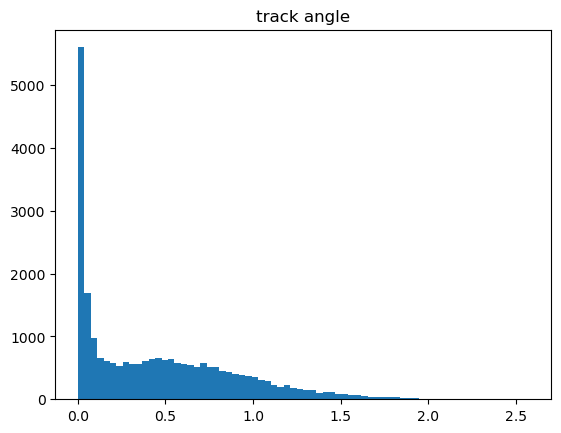

In [53]:
a= ak.flatten(file['recTree'].arrays(['rec.reco.trk.crttrack.angle'])['rec.reco.trk.crttrack.angle'])
plt.hist(a, 70)
plt.title('track angle')

(array([2443., 2710., 2804., 3016., 2399., 2598., 2600., 2538., 2593.,
        2741., 2325., 2319., 2357., 2426., 2681., 2682., 2558., 2431.,
        2945., 2894., 2650., 2461., 2674., 2719., 2493., 2485., 2411.,
        2688., 2551., 2579., 2666., 2467., 3056., 2906., 3078., 2440.,
        3195., 5684., 2555., 2810., 2355., 2554., 2695., 2767., 2638.,
        2540., 3790., 2636., 3361., 2599., 3017., 2574., 2701., 2393.,
        3317., 2715., 2402., 2780., 2772., 2253., 2337., 2808., 2693.,
        2611., 2394., 2867., 2899., 3108., 2634., 2670.]),
 array([-1699.934   , -1654.2195  , -1608.5051  , -1562.7906  ,
        -1517.0763  , -1471.3618  , -1425.6473  , -1379.933   ,
        -1334.2185  , -1288.5042  , -1242.7897  , -1197.0752  ,
        -1151.3608  , -1105.6464  , -1059.932   , -1014.2175  ,
         -968.5031  ,  -922.7887  ,  -877.0742  ,  -831.3598  ,
         -785.6454  ,  -739.93097 ,  -694.21655 ,  -648.5021  ,
         -602.78766 ,  -557.07324 ,  -511.35883 ,  -465.6443

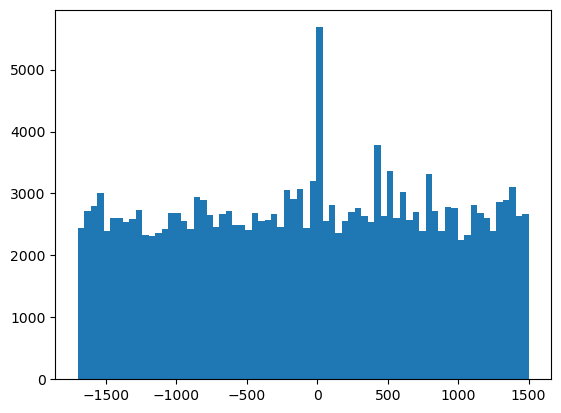

In [60]:
a= ak.flatten(file['recTree']['rec.crt_tracks.time'].arrays()['rec.crt_tracks.time'])
plt.hist(a, 70)
